# Exploratory Data Analysis of Ford GoBike System
## by Ebele Shaba

## Introduction
> The dataset used for the project is the Ford goBike System Data, collected and created in the year 2019. This dataset gives information about the rides of individuals in relation to a bike sharing system in the bay area of San Francisco. The data originally contains information about 183,412 individuals making use of the Ford goBike system. However, after wrangling it then had 174,952 entries due to the dropped null values and 24 columns due to the feature engineering of six additional columns. The dataset has a combination of different data types in their correct form for analysis. This dataset was retrived in the year 2019 and can be retrived from https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv.
Through techniques of wrangling and exploratory and explanatory visualisations, the goal of the project which to generate useful insights shall be met.

## Investigation Overview
> This projects aim is to understand the behaviour of the data and to point out the patterns therein. The main features of interest in the data through assessment includes; age/birth year, type of users:, gender, and the time duration of the bike trips. 
Bar charts were plotted for the majority of my variables of interest. For the user_type, it can be seen for the chart that majority of them are suscribers. The bar chart also shows that they have more male users that other gender types. The final barchart for the member_birth_year, displayes a curve with majority of users born between 1980 and 1998 with the highest peaks in 1988 and 1993. There were some unsual behaviour in the histograms for duration_min and duration_sec with long tails of outliers in both plots a closer look was taken by reducting the x-axis limits however this was still flawed representaion of the plots. Eventually, the log of the duration_min and duration_sec was taken and plotted to generate a better looking normalized plot.
The behaviour of user_type was introduced in the univariate analysis, were most of the users were subscribers, the same goes here. In addition an increase can be seen in the number of all member_gender types from customers to subscribers. Violin and box plots were created to depict relationship between age and user_type, the two plots show that a large number of users are between the ages of 20 to 60 and this is similar for both of the user_type. There regardless of the user_type a certain age range uses the bike system more. 
From scatterplot visualisations, it has become clearer and clearer that regardless of the member_gender and user_type the age range remains the same with majority of riders between 20 and 60 years.

## Preliminary Wrangling

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Loading the bike_tripdata.csv dataset.

bike_trip = pd.read_csv('bike_tripdata.csv')

In [4]:
# Generating information of the data structure and data types.

print(bike_trip.shape)
print(bike_trip.info())
bike_trip.head()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Checking to the see the amount of null values in each column.

bike_trip.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Dropping all the null values and ensuring all the columns have equal amount of non null values for efficiency.

bike_trip = bike_trip.dropna()
print(bike_trip.notnull().sum())

duration_sec               174952
start_time                 174952
end_time                   174952
start_station_id           174952
start_station_name         174952
start_station_latitude     174952
start_station_longitude    174952
end_station_id             174952
end_station_name           174952
end_station_latitude       174952
end_station_longitude      174952
bike_id                    174952
user_type                  174952
member_birth_year          174952
member_gender              174952
bike_share_for_all_trip    174952
dtype: int64


In [7]:
# change endtime and starttime to datetime datatype

bike_trip[['start_time', 'end_time']] = bike_trip[['start_time', 'end_time']].apply(pd.to_datetime, 
                                                                                    format='%Y-%m-%d %H:%M:%S.%f')

In [8]:
# Change the birth year of members column to interger type.

bike_trip['member_birth_year'] = bike_trip['member_birth_year'].astype(int)

In [9]:
# Change the time duration in seconds column to type float.

bike_trip['duration_sec'] = bike_trip['duration_sec'].astype(float)

In [10]:
# Separating the elements of the start_time column by extracting the date and placing the date into a newly created 
# start_date column.

bike_trip['start_date']= bike_trip['start_time'].dt.date
bike_trip['start_time']= bike_trip['start_time'].dt.time

In [11]:
# Separating the elements of the end_time column by extracting the date and placing the date into a newly created 
# end_date column.

bike_trip['end_date']= bike_trip['end_time'].dt.date
bike_trip['end_time']= bike_trip['end_time'].dt.time

In [12]:
# Separating the elements of the start_date and end_date columns by extracting the day and month and placing 
# the day and monnth into a newly created columns.

bike_trip['monthS']= pd.to_datetime(bike_trip['start_date']).dt.month
bike_trip['dayS']= pd.to_datetime(bike_trip['start_date']).dt.day
bike_trip['monthE']= pd.to_datetime(bike_trip['end_date']).dt.month
bike_trip['dayE']= pd.to_datetime(bike_trip['end_date']).dt.day

In [13]:
# Checking to see if the new columns where properly created.

bike_trip.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,monthS,dayS,monthE,dayE
0,52185.0,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,2019-02-28,2019-03-01,2,28,3,1
2,61854.0,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,2019-02-28,2019-03-01,2,28,3,1
3,36490.0,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,2019-02-28,2019-03-01,2,28,3,1
4,1585.0,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,2019-02-28,2019-03-01,2,28,3,1
5,1793.0,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,2019-02-28,2019-03-01,2,28,3,1


In [14]:
# Creation of a new column duration_min by dividing the duration_sec column by 60.

duration_min = bike_trip['duration_sec'] / 60
bike_trip['duration_min'] = duration_min.round(2)

In [15]:
# Creation of a new column duration_hr by dividing the duration_sec column by 3600.

duration_hr = bike_trip['duration_sec'] / 3600
bike_trip['duration_hr'] = duration_hr.round(2)

In [16]:
# Change the data type of start_station_id, end_station_id, and bike_id to string data type.

bike_trip[['start_station_id', 'end_station_id', 'bike_id']] = bike_trip[['start_station_id', 'end_station_id',
                                                                          'bike_id']].astype(str)

In [17]:
# Checking to see if the new columns where properly created.

bike_trip.shape

(174952, 24)

## Univariate Exploration


## Visualization Group A
> Bar charts were plotted for the variables of interest. For the user_type, it can be seen for the chart that majority of them are suscribers, it may mean that their policicies on suscription are more favourable to users. The bar chart also shows that they have more male users that other gender types, which can be for differnt reasons which more features can help solve. Finally, for the member_birth_year, the chart displayes a curve with majority of users born between 1980 and 1998 with the highest peaks in 1988 and 1993.

In [18]:
# Creation of  bar function for univariate bar chart of different features.
def bar(Y,var,X,W,Z):
    plt.figure(figsize = [Y,5])
    base_color = sns.color_palette()[4]
    sns.countplot(data = bike_trip, x = var, color = base_color)
    labels = plt.xticks(rotation=X)
    plt.title(Z)
    plt.xlabel(W, fontsize=10);

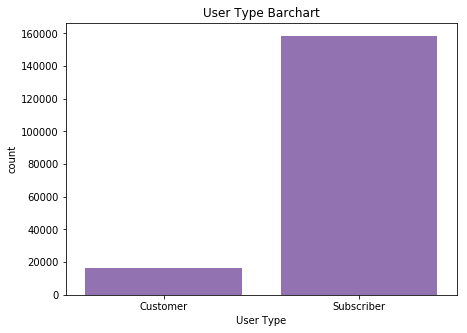

In [19]:
# Placing user_type into the bar function.
bar(7,'user_type', 0, 'User Type', 'User Type Barchart')

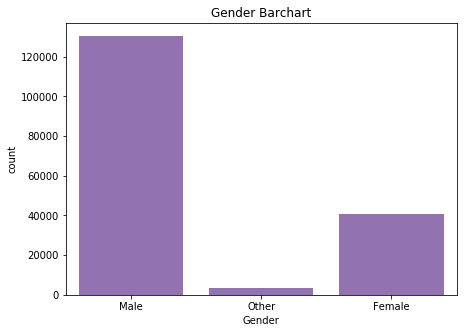

In [20]:
# Placing member_gender into the bar function.
bar(7, 'member_gender', 0, 'Gender', 'Gender Barchart')

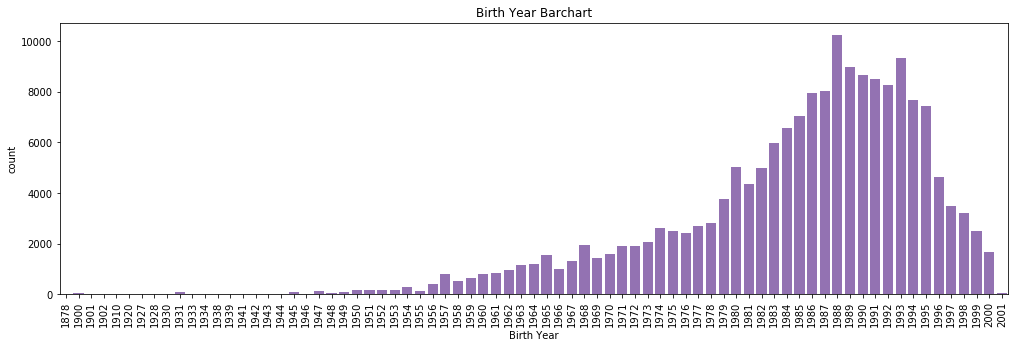

In [21]:
# Placing member_birth_year into the bar function.
bar(17, 'member_birth_year', 90, 'Birth Year', 'Birth Year Barchart')

In [22]:
# Checking to ensure the unique values of bike_share_for_all_trip column.
bike_trip.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

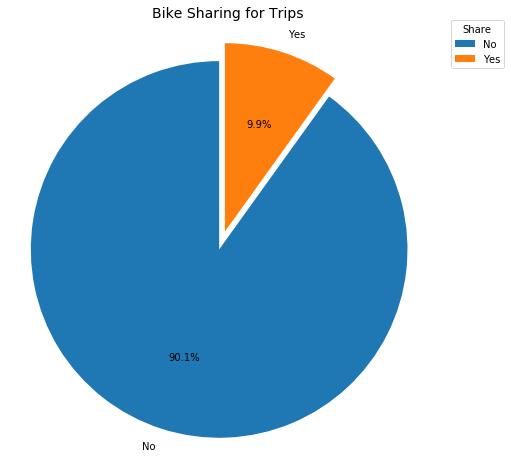

In [23]:
# Creating and plotting a piechart for  the bike_share_for_all_trip column.
plt.figure(figsize=(8,8))
counts = bike_trip['bike_share_for_all_trip'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode=[0.05,0.05], startangle=90, counterclock=True)
plt.legend(title='Share', bbox_to_anchor=(1,1.02), loc='upper left')
plt.axis('square', radius=1000)
plt.title('Bike Sharing for Trips', fontsize=14);

In [24]:
# Creation of  hist function for univariate histogram for duration_min.
def hist(y):
    base_color = sns.color_palette()[2]
    bins= np.arange(0, bike_trip['duration_min'].max()+1, 1)
    plt.hist(data=bike_trip, x='duration_min', bins=bins, color=base_color)
    plt.title('Distribution of Trip Duration', fontsize=14)
    plt.xlabel('Time Duration Frequency (mins)', fontsize=10)
    plt.xlim(0,y);

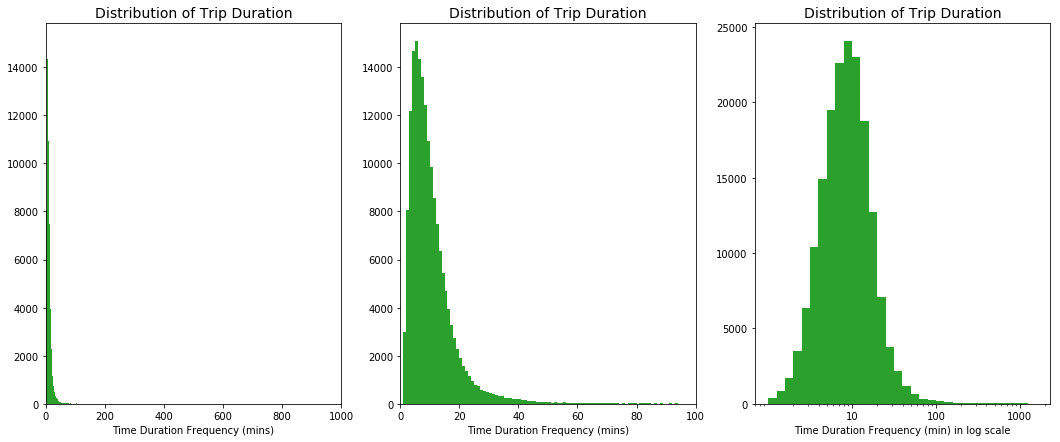

In [25]:
# Initiating subplots for the histograms to be side by side but on different rows for easy analysis.
# Placing the xlim maximum point into the hist function of the first and second subplots.
plt.figure(figsize=(18,7))
plt.subplot(1,3,1)
hist(1000);

plt.subplot(1,3,2)
hist(100);

# Creating the log of duration_min in the third subplot to generate a normal distribution.
plt.subplot(1,3,3)
base_color = sns.color_palette()[2]
bins = 10 ** np.arange(0, np.log10(bike_trip['duration_min'].max())+0.1, 0.1)
ticks = [10, 100, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=bike_trip, x='duration_min', bins=bins, color=base_color)
plt.title('Distribution of Trip Duration', fontsize=14)
plt.xscale('log')
plt.xlabel('Time Duration Frequency (min) in log scale', fontsize=10)
plt.xticks(ticks,labels);

## Visualization Group B
> There were some unsual behaviour in the histograms for duration_sec with long tails of outliers in the plot a closer look was taken by reducting the x-axis limits however this was still flawed representaion of the plot. Eventually, the log of the duration_sec was taken and plotted to generate a better looking normalized plot.

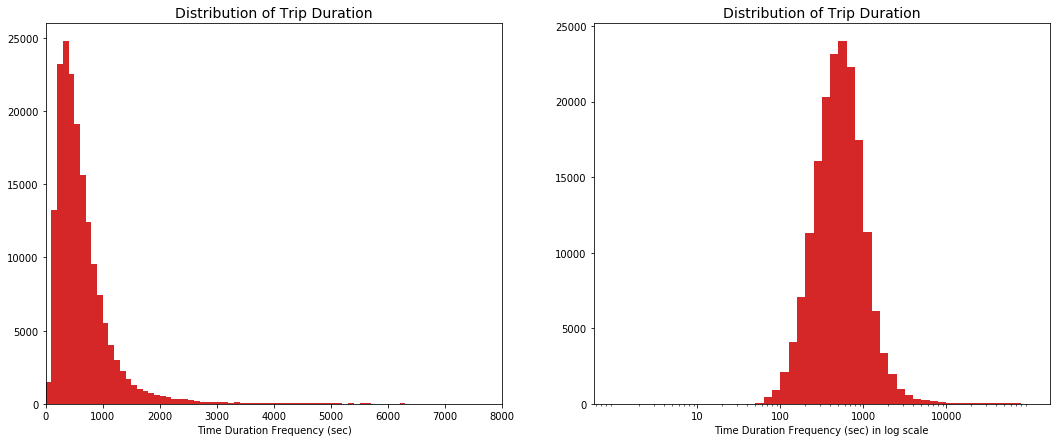

In [26]:
#Initiating subplots for the histograms to be side by side but on different rows for easy analysis.
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
base_color = sns.color_palette()[3]
bins= np.arange(0, bike_trip['duration_sec'].max()+100, 100)
plt.hist(data=bike_trip, x='duration_sec', bins=bins, color=base_color)
plt.title('Distribution of Trip Duration', fontsize=14)
plt.xlabel('Time Duration Frequency (sec)', fontsize=10)
plt.xlim(0,8000);

# Creating the log of duration_sec in the second subplot to generate a normal distribution.
plt.subplot(1,2,2)
base_color = sns.color_palette()[3]
bins = 10 ** np.arange(0, np.log10(bike_trip['duration_sec'].max())+0.1, 0.1)
ticks = [10, 100, 1000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=bike_trip, x='duration_sec', bins=bins, color=base_color)
plt.title('Distribution of Trip Duration', fontsize=14)
plt.xscale('log')
plt.xlabel('Time Duration Frequency (sec) in log scale', fontsize=10)
plt.xticks(ticks,labels);

## Bivariate Exploration

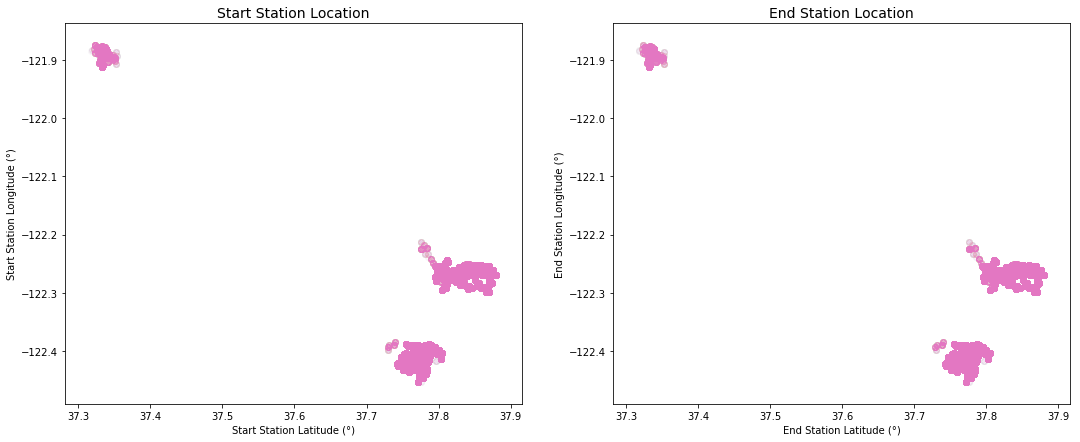

In [27]:
# Scatterplots below using the longitude and latitude  of the start and end stations to create location points on 
# the plot.
plt.figure(figsize=(18,7))
base_color = sns.color_palette()[6]

# Subplot 1 for start station locations.
plt.subplot(1,2,1)
plt.scatter(data=bike_trip, x='start_station_latitude', y='start_station_longitude', color=base_color, alpha=1/100)
plt.title('Start Station Location', fontsize=14)
plt.xlabel('Start Station Latitude (°)', fontsize=10)
plt.ylabel('Start Station Longitude (°)', fontsize=10);

# Subplot 2 for end station locations.
plt.subplot(1,2,2)
plt.scatter(data=bike_trip, x='end_station_latitude', y='end_station_longitude', color=base_color, alpha=1/100)
plt.title('End Station Location', fontsize=14)
plt.xlabel('End Station Latitude (°)', fontsize=10)
plt.ylabel('End Station Longitude (°)', fontsize=10);

In [28]:
# Creation of  rel function for bivariate clustered bar chart of user_type against other features.
def rel(var,P):
    #base_color = sns.color_palette()[2]
    sns.countplot(data = bike_trip, x = 'user_type', hue = var)
    plt.xlabel('User Type', fontsize=10)
    plt.title(P)
    plt.legend(title=var.title());

## Visualization Group C
> The behaviour of user_type was introduced in the univariate analysis, were most of the users were subscribers, the same goes here. In addition an increase can be seen in the number of all member_gender types from customers to subscribers. The bar chart was also created for the user_type and bike_share_for_all_trip to note sharing behaviour.it can be noted that no customer engages in bike sharing, while a low amount of subscribers do.

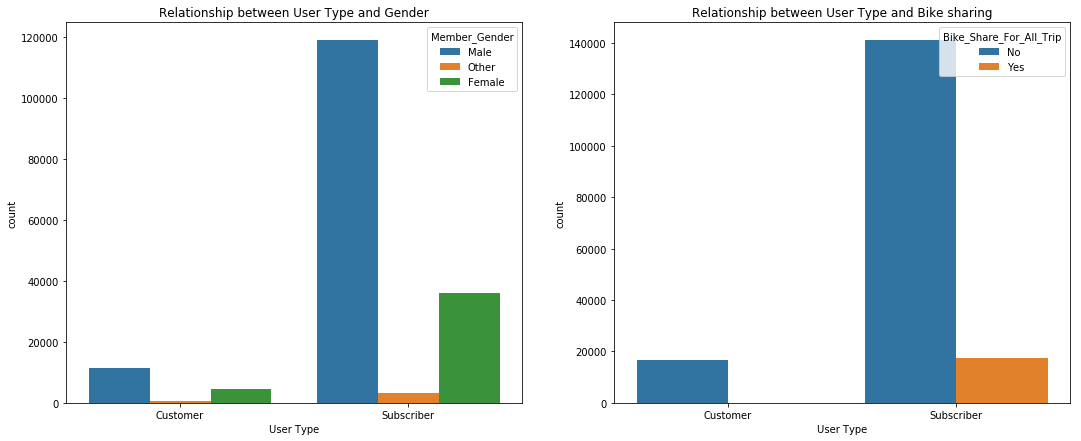

In [29]:
# Placing member_gender into the rel function.
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
rel('member_gender', 'Relationship between User Type and Gender');

# Placing bike_share_for_all_trip into the rel function.
plt.subplot(1,2,2)
rel('bike_share_for_all_trip', 'Relationship between User Type and Bike sharing');

In [30]:
# Creation of  violin function for bivariate violin plot of user_type against other features.
def violin(var1):
    base_color = sns.color_palette()[0]
    sns.violinplot(data=bike_trip, x='user_type', y=var1, color=base_color)
    plt.title('Violin plot Relationship between User Type and Age')
    plt.xlabel('User Type', fontsize=10)
    plt.ylabel(var1.title(), fontsize=10);

In [31]:
# Creation of  box function for bivariate box plot of user_type against other features.
def box(var2):
    base_color = sns.color_palette()[2]
    sns.boxplot(data=bike_trip, x='user_type', y=var2, color=base_color)
    plt.title('Box plot Relationship between User Type and Age')
    plt.xlabel('User Type', fontsize=10)
    plt.ylabel(var2.title(), fontsize=10);

In [32]:
# Creating a new column age from member_birth_year.
bike_trip['age'] = 2019 - bike_trip['member_birth_year']

## Visualization Group D
>Violin and box plots were created to depict relationship between age and user_type, the two plots show that a large number of users are between the ages of 20 to 60 and this is similar for both of the user_type. There is regardless of the user_type a certain age range uses the bike system more.

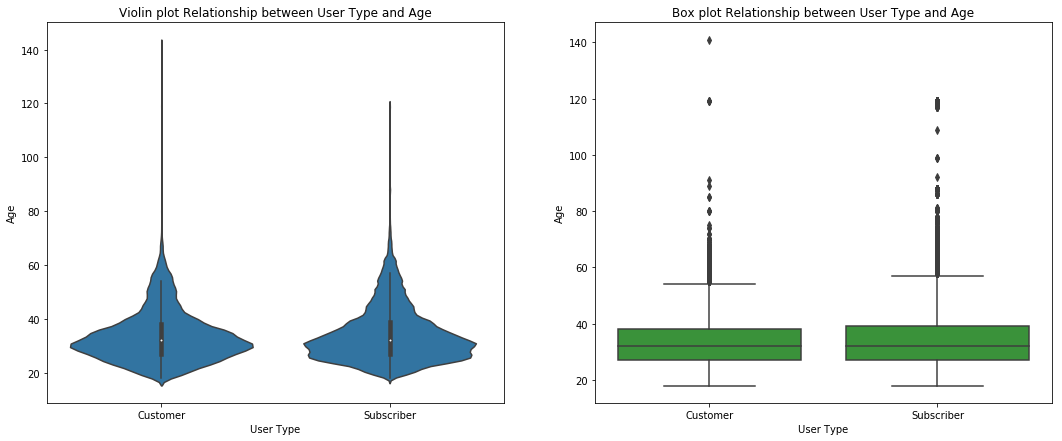

In [33]:
# Placing age into the violin function.
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
violin('age');

# Placing age into the box function.
plt.subplot(1,2,2)
box('age');

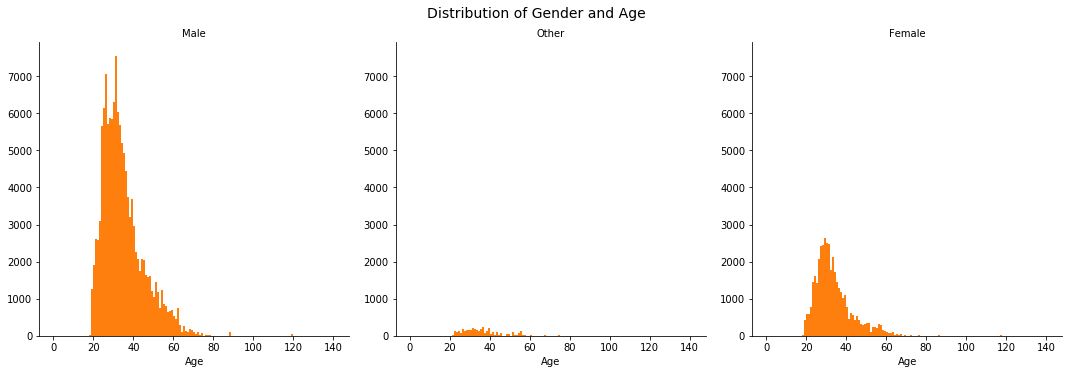

In [34]:
# Faceted histogram showing the distribution of age against member_gender.
base_color = sns.color_palette()[1]
g= sns.FacetGrid(bike_trip, col='member_gender', margin_titles=True, size=5)
bins= np.arange(0, bike_trip['age'].max()+1, 1)
g.map(plt.hist, 'age', bins=bins, color=base_color)
g.set_axis_labels('Age')
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Distribution of Gender and Age', y=1.03, fontsize=14);

## Multivariate Exploration

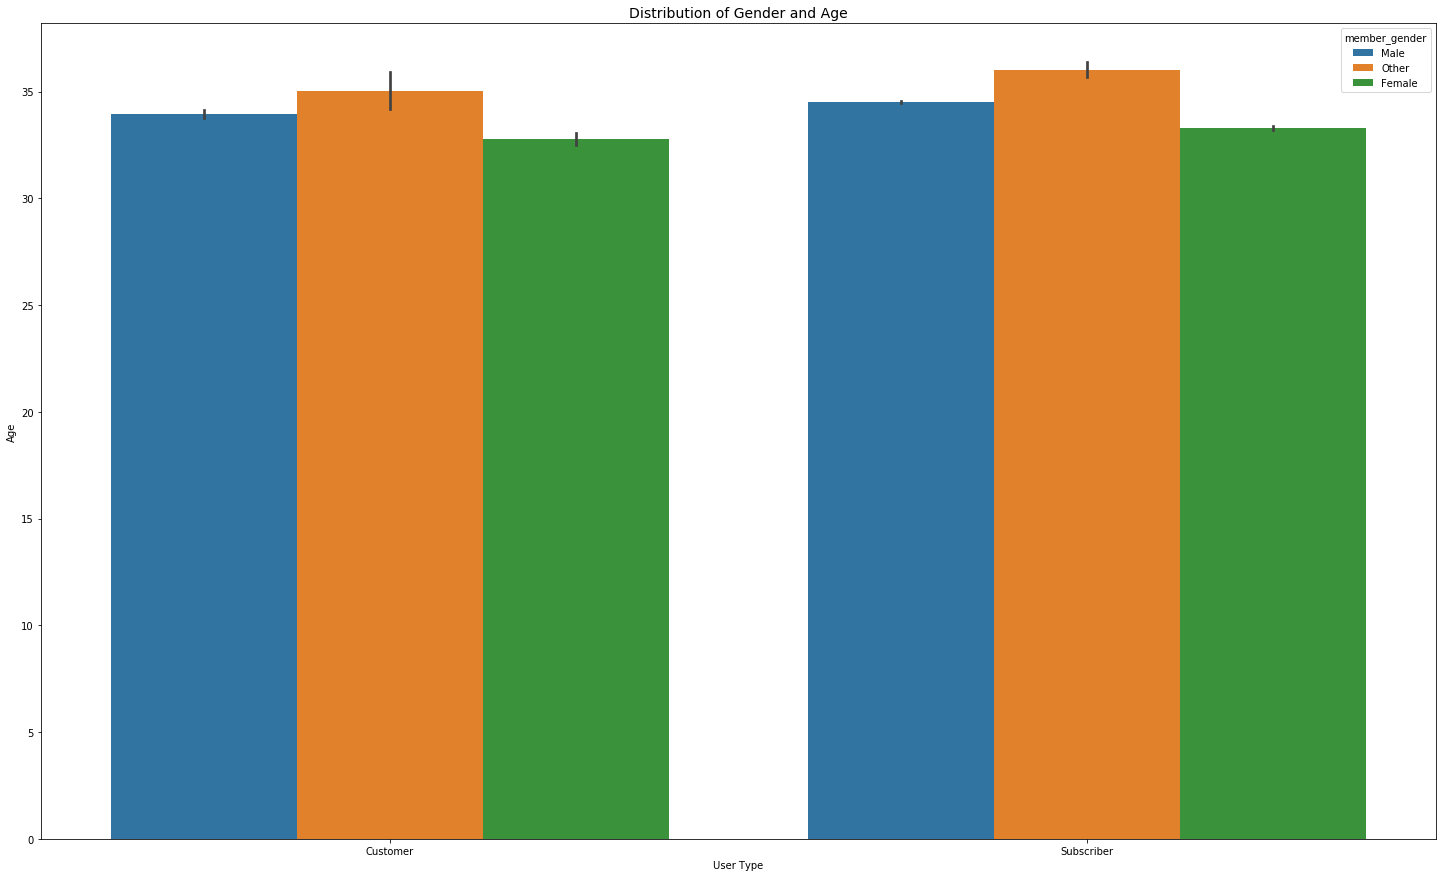

In [35]:
# Multivariate faceted barplot, showing the relationship between age, user_type and member_gender.
plt.figure(figsize=(25,15))
sns.barplot(data=bike_trip, x='user_type', y='age', hue='member_gender')
plt.title('Distribution of Gender and Age', fontsize=14)
plt.xlabel('User Type')
plt.ylabel('Age');

## Visualization Group E
> Scatterplot for the relationship between age, gender and time duration shows that the male users then to have a slightly higher duration frequency of bike trips to other gender types regardless of similar age range.

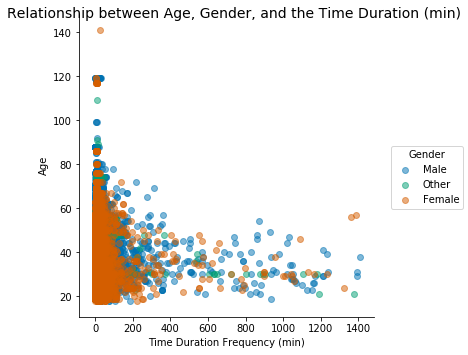

In [36]:
# Multivariate scatterplot showing the  age, member_gender, and the duration_min one takes for a trip.
plt.figure(figsize=(25,15))
g= sns.FacetGrid(data=bike_trip, hue='member_gender', size=5, palette='colorblind')
g.map(plt.scatter, 'duration_min', 'age', alpha=1/2);
g.fig.suptitle('Relationship between Age, Gender, and the Time Duration (min)', fontsize=14)
g.set_xlabels('Time Duration Frequency (min)')
g.set_ylabels('Age')
g.add_legend(title='Gender');

In [37]:
# Creation of line function for line plots to display relationship between duration_min, dayS, and a third feature.
def line(varA,varB):
    g=sns.FacetGrid(data=bike_trip, col=varA, row='monthS', size=5,aspect = 1.5);
    g.map(sns.pointplot,'dayS', 'duration_min');
    g.fig.suptitle(varB,  y=1.03, fontsize=14)
    g.set_titles(col_template = '{col_name}')
    g.set_xlabels('Days')
    g.set_ylabels('Duration in minutes');

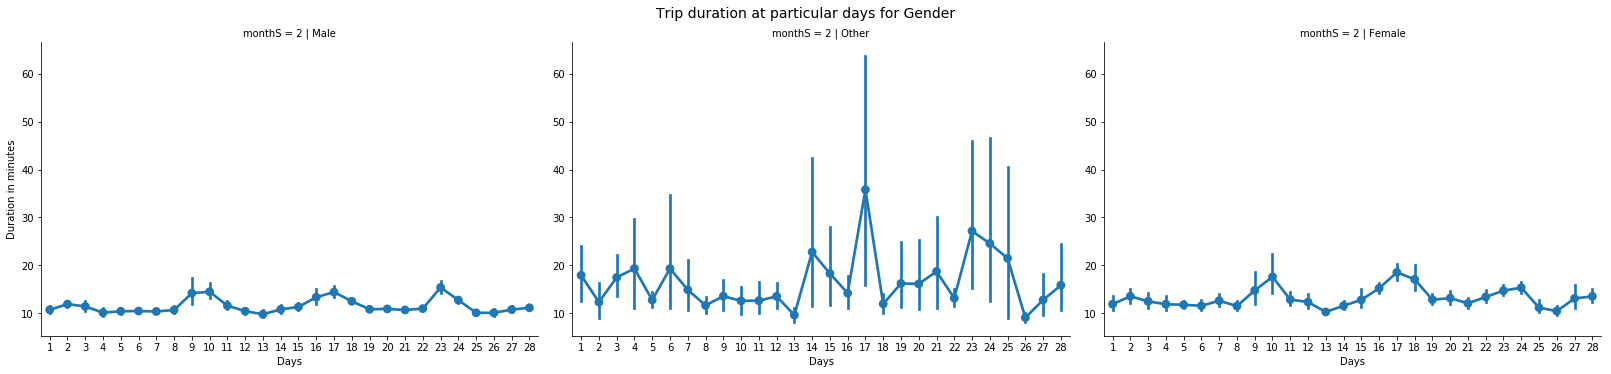

In [38]:
# Placing member_gender into the line function.
plt.figure(figsize=(10,15))
line('member_gender', 'Trip duration at particular days for Gender');

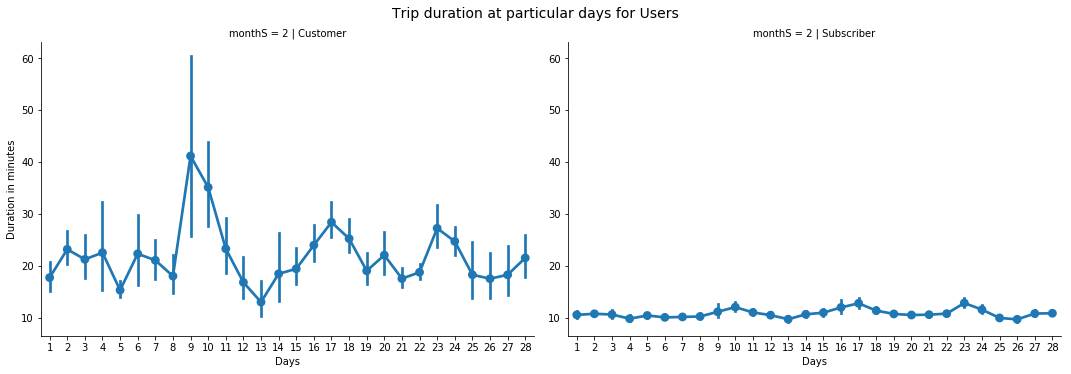

In [39]:
# Placing user_type into the line function.
plt.figure(figsize=(10,15));
line('user_type', 'Trip duration at particular days for Users');

## Key Insights for Presentation
> This project succeeded in giving some valuable insights on the way the Ford goBike System works. One major insight derived from the data is one the user type, after various plots from univariate to multivariate methods it show clearly that majority of users are subscribers regardless of their age or gender. This may mean that their policicies on suscription are more favourable to users and therefore should be continued. What is also interesting to note is regardless of the gender the age ranges do not differ too or vice versa.
The above can be used in addition with other features to create business policies that can target users. Therefore, in case of advertisement, whom should ford target? Male subscribers i.e. with subscription model within ages 20 to 60(except they have a data driven market for females or other gender types within the same age range and user model).
Data wrangling, data visualisation, and feature engineering techniques were performed in the project.